In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Cardiotocographic.csv") 
df.head()


,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [2]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB
None


In [3]:
print(df.shape)


(2126, 14)


In [4]:
print(df.columns)

Index(['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
       'MLTV', 'Width', 'Tendency', 'NSP'],
      dtype='object')


In [5]:
df.isna().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [15]:
df = df.fillna(df.median(numeric_only=True))

In [16]:
def detect_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    return outliers

for col in df.select_dtypes(include='number').columns:
    print(col, " → Outliers:", len(detect_outliers(col)))


LB  → Outliers: 10
AC  → Outliers: 43
FM  → Outliers: 347
UC  → Outliers: 13
DL  → Outliers: 125
DS  → Outliers: 120
DP  → Outliers: 284
ASTV  → Outliers: 10
MSTV  → Outliers: 80
ALTV  → Outliers: 318
MLTV  → Outliers: 81
Width  → Outliers: 10
Tendency  → Outliers: 10
NSP  → Outliers: 559


In [17]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
LB,2126.0,133.340204,11.214379,51.842487,126.000000,133.000000,140.000000,214.000000
AC,2126.0,0.003204,0.004373,-0.019284,0.000000,0.001634,0.005606,0.038567
FM,2126.0,0.009894,0.067540,-0.480634,0.000000,0.000000,0.002567,0.961268
UC,2126.0,0.004391,0.003340,-0.014925,0.001851,0.004484,0.006536,0.030002
DL,2126.0,0.001895,0.003343,-0.015393,0.000000,0.000000,0.003289,0.030769
DS,2126.0,0.000002,0.000141,-0.001353,0.000000,0.000000,0.000000,0.002706
DP,2126.0,0.000173,0.000836,-0.005348,0.000000,0.000000,0.000000,0.010695
ASTV,2126.0,46.995984,18.813973,-63.000000,32.000000,49.000000,61.000000,162.000000
MSTV,2126.0,1.364378,1.173632,-6.600000,0.700000,1.200000,1.700000,13.800000
ALTV,2126.0,10.285964,21.205041,-91.000000,0.000000,0.000000,11.000000,182.000000


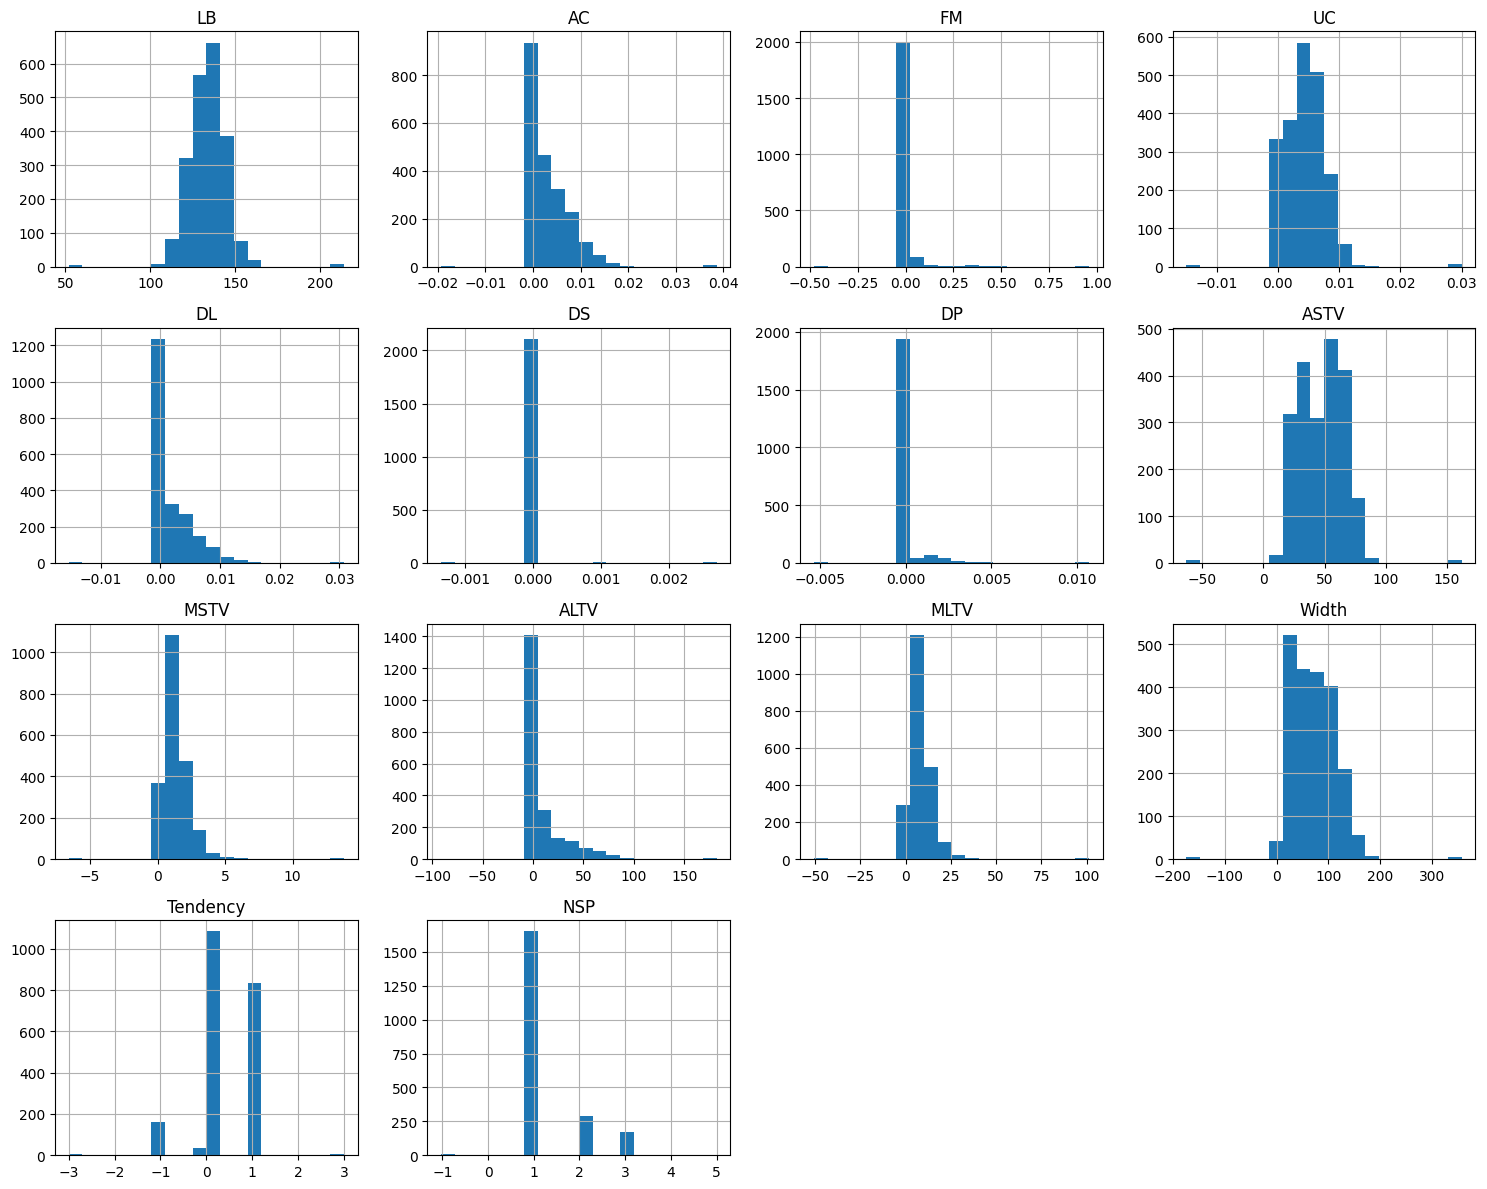

In [18]:
df.hist(figsize=(15, 12), bins=20)
plt.tight_layout()
plt.show()


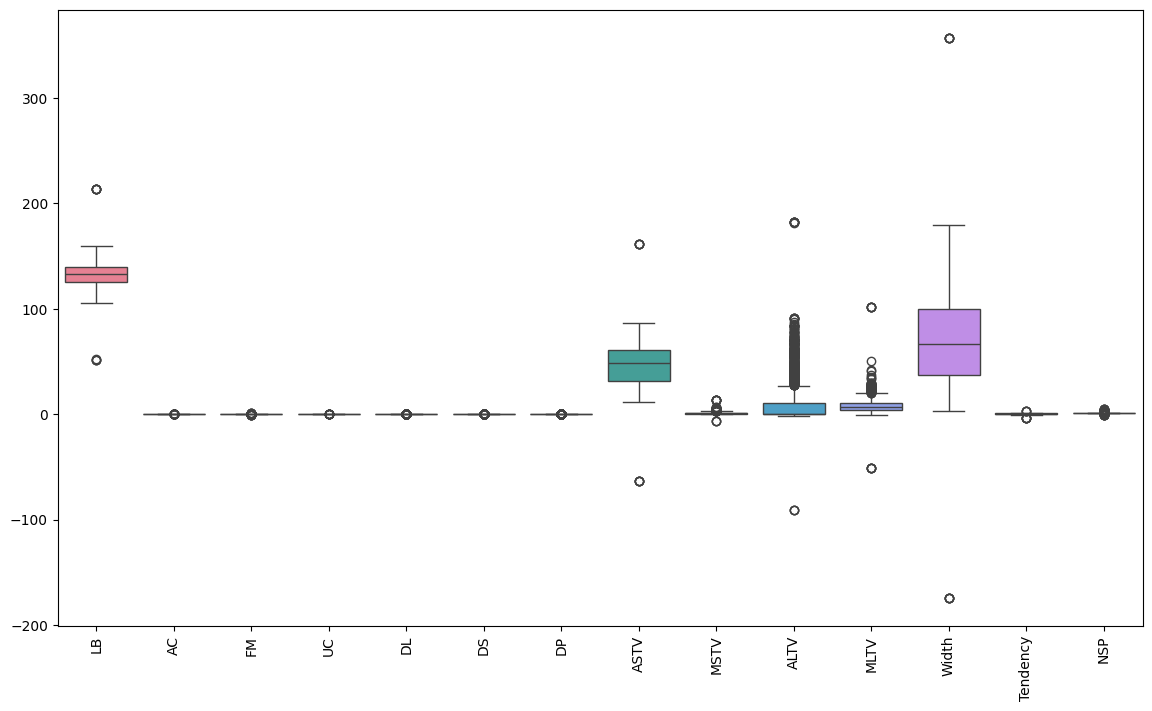

In [19]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()


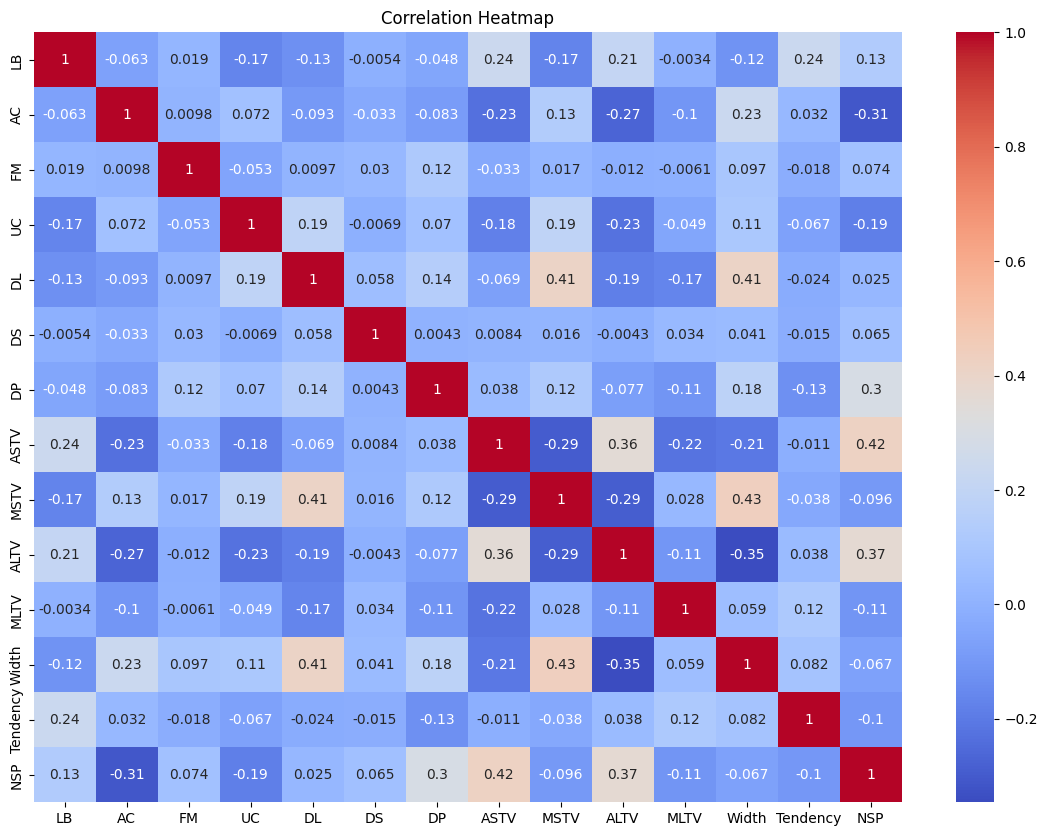

In [20]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


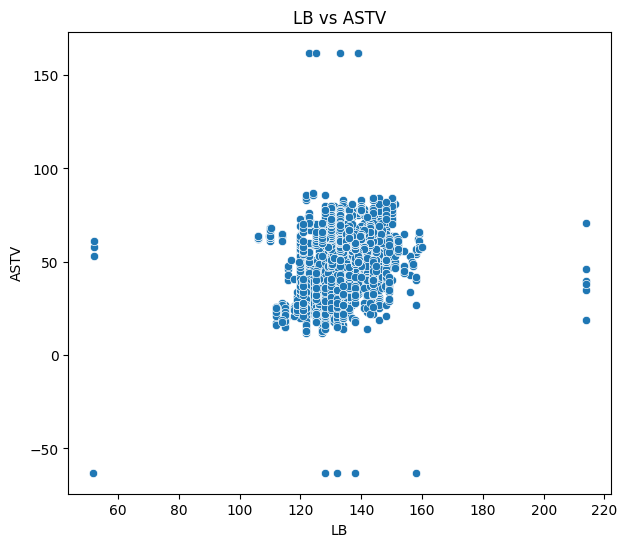

In [21]:
plt.figure(figsize=(7,6))
sns.scatterplot(x='LB', y='ASTV', data=df)
plt.title("LB vs ASTV")
plt.show()


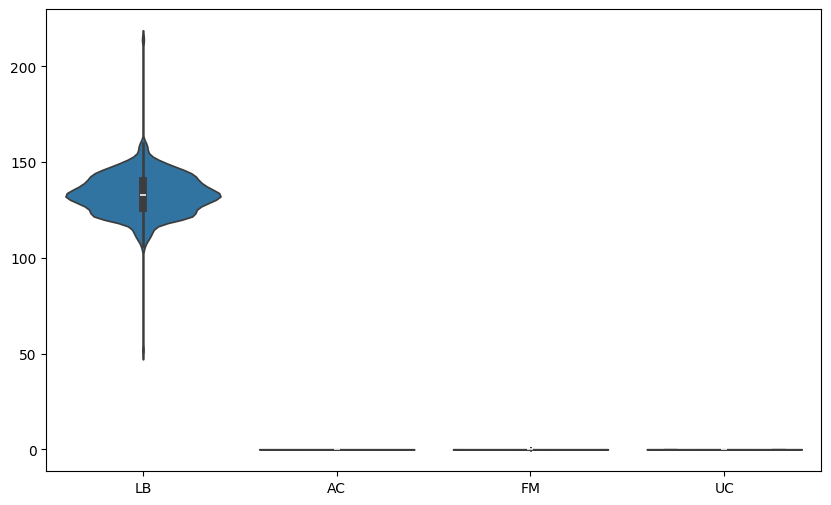

In [22]:
plt.figure(figsize=(10,6))
sns.violinplot(data=df[['LB','AC','FM','UC']])
plt.show()


In [23]:
corr = df.corr().abs().unstack().sort_values(ascending=False)
corr.head(10)


LB        LB          1.0
DL        DL          1.0
FM        FM          1.0
AC        AC          1.0
UC        UC          1.0
MLTV      MLTV        1.0
Tendency  Tendency    1.0
Width     Width       1.0
ASTV      ASTV        1.0
MSTV      MSTV        1.0
dtype: float64